In [1]:
%pylab inline

FigHigh=10
FigWidth=FigHigh/1.6180

#pylab.rcParams['figure.figsize'] = (FigHigh,FigWidth)

pylab.rcParams['legend.fontsize'] = 22
pylab.rcParams['lines.linewidth'] = 2

pylab.rcParams['mathtext.default'] = "regular"
pylab.rcParams['text.usetex'] = False
pylab.rcParams['font.style'] = "normal"
pylab.rcParams['font.family'] = "sans"

pylab.rcParams['axes.labelsize'] = 18
pylab.rcParams['xtick.labelsize'] = 18
pylab.rcParams['ytick.labelsize'] = 18

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import FloatSlider

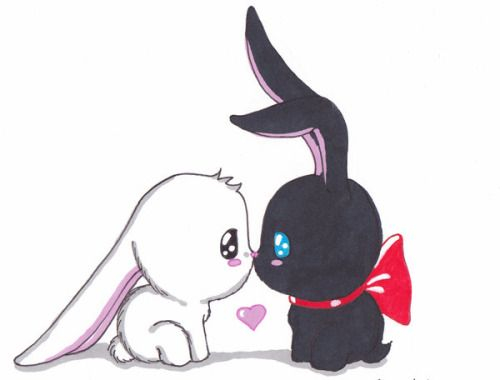

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

Image(filename = "./Rabbit.In.Love.jpg", width=250, height=250)

This is the true story of two rabbits. They are in love and they don't care about
how much rabbit will populate their place after they made love.

Human, however, kind of care so they build up a model to evaluate how much rabbit will
be present after a few generation. What they found is astonishing !!!

The final population take this simple, analytical form:

$$ P_{Fin} = R \cdot P_{Init} \cdot (1-P_{Init}) $$

The term $ R \cdot P_{Init} $ define how much the population will grow. This is a line with a positive slop equal to R, the Reproduction Rate (RRate).

The term $ 1-P_{Init} $ is responsible for the decrease of the final population. This line has a negative slop and represent the mortality rate.

In [4]:
# The above formula is implemented in the following function (CalcFinPop)
# Provided an initial population InitPop and a reproduction rate RRate
# This function calculate the population in the next generation ( one step ahead )

def CalcFinPop(InitPop, RRate):
    return RRate*InitPop*(1-InitPop)

In [5]:
# In order to display a graph of FinPop VS InitPop,
# Humans created an range of all possible Initial Population values (from 0 to 1)

InitPopArray     = linspace(0,1,50)
FinPopArray      = np.zeros((len(InitPopArray),4))
FinPopArray[:,0] = InitPopArray

# Provided an array of initial population values InitPopArray and a reproduction rate RRate
# This function calculate the corresponding array of final population value using CalcFinPop

def CalcFinPopArray(InitPopArray, RRate):
    for i in range(len(InitPopArray)):
        FinPopArray[i,1]=CalcFinPop(InitPopArray[i], RRate)
        FinPopArray[i,2]=1-InitPopArray[i]
        FinPopArray[i,3]=RRate*InitPopArray[i]

In [6]:
# Humans are now interested in the final population after a given number of generations (not just one)

InitPopBack=0.05               # They start with this initial value
InitPop=InitPopBack            # saved value in order to propagate the calculation through the iterations
NGen=95                        # Number of Generations
FinPopNGen=np.zeros((NGen,2))  # Evolution of the final population through the generations goes in FinPopNGen

# Provided a Reproduction Rate (RRate), this function calculate the evolution of the Final Population
# from generation to generation.
# The Final Population of one generation is taken as the Initial Population of the next generation

def CalcFinPopNGen(RRate):
    InitPop=InitPopBack
    for j in range(NGen):
        NewPop=CalcFinPop(InitPop, RRate)
        InitPop=NewPop
        FinPopNGen[j,0]=j
        FinPopNGen[j,1]=NewPop

In [7]:
def DynamicFigure01(RRate):
    
    fig, axs = plt.subplots(1, 2, figsize=(20,5), squeeze=False);
    fig.set_size_inches(15,5);
    
    CalcFinPopArray(InitPopArray, RRate);
    
    axs[0,0].plot(InitPopArray,FinPopArray[:,1],color='blue', lw=4);
    axs[0,0].plot(InitPopArray,FinPopArray[:,2],'--', color='blue', lw=2);
    axs[0,0].plot(InitPopArray,FinPopArray[:,3],'--', color='blue', lw=2);
    
    axs[0,0].set_ylim([0, 1])
    axs[0,0].set_xlabel('Initial Population\n(Normalized to 1)')
    axs[0,0].set_ylabel('Final Population\n(Normalized to 1)')
    
    CalcFinPopNGen(RRate);
        
    axs[0,1].plot(FinPopNGen[:,0],FinPopNGen[:,1],color='blue', lw=2);

    axs[0,1].set_ylim([0, 1])
    axs[0,1].set_xlabel('Number of Generations')
    #axs[0,1].set_ylabel('Final Population\n(Normalized to 1)')
    
    fig.suptitle('Final Population VS Initial Population', fontsize=24)
    
    #fig = plt.figure();

    
#interactive_plot = interactive(UpdateThisFigure01, RRate=(2.5, 3.9));
interactive_plot = interactive(DynamicFigure01, RRate=widgets.FloatSlider(min=2.51,max=3.99,step=0.02,value=2.6));
interactive_plot

interactive(children=(FloatSlider(value=2.6, description='RRate', max=3.99, min=2.51, step=0.02), Output()), _…

In [8]:

# Do you want a higher resolution:
# write r_range=np.linspace(2.5,4,5000000) 
r_range=np.linspace(2.5,4,10000)
PhDiag=np.zeros((len(r_range),2))


def CalcPhaseDiag():
    InitPop=0.05
    for i in range(len(r_range)):
        r_act=r_range[i]
        PhDiag[i,0]=r_act
    
        for j in range(NGen):
            XNew=CalcFinPop(InitPop, r_act)
            InitPop=XNew
            PhDiag[i,1]=XNew

In [9]:
def DynamicFigure02(RRate):
    
    fig, axs = plt.subplots(1, 2, figsize=(20,5), squeeze=False);
    fig.set_size_inches(15,5);
    
    CalcFinPopNGen(RRate);
        
    axs[0,0].plot(FinPopNGen[:,0],FinPopNGen[:,1],color='blue', lw=2);

    axs[0,0].set_ylim([0, 1])
    axs[0,0].set_ylabel('Final Population\n(Normalized to 1)')
    axs[0,0].set_xlabel('Number of Generations')

    CalcPhaseDiag();
    
    axs[0,1].plot(PhDiag[:,0],PhDiag[:,1],linestyle="",marker="o",color='blue',markersize=0.2)
    axs[0,1].vlines(x=RRate, ymin=0.0, ymax=1.0, color='r')
    axs[0,1].set_xlabel('Reproduction Rate')
    #axs[0,1].set_xlabel('Reproduction Rate')
    
    
interactive_plot = interactive(DynamicFigure02, RRate=widgets.FloatSlider(min=2.51,max=3.99,step=0.02,value=2.6));
interactive_plot

interactive(children=(FloatSlider(value=2.6, description='RRate', max=3.99, min=2.51, step=0.02), Output()), _…